#Deep Learning Background

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Milestone 1: Perceptrons (1957)
class Perceptron:
    def __init__(self, num_inputs):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return 1 if summation > 0 else 0

# Milestone 2: Backpropagation (1970s-1980s)
class NeuralNetwork:
    def __init__(self, num_inputs, num_hidden, num_outputs):
        self.hidden_weights = np.random.rand(num_inputs, num_hidden)
        self.output_weights = np.random.rand(num_hidden, num_outputs)

    def forward(self, inputs):
        hidden_layer = np.dot(inputs, self.hidden_weights)
        hidden_layer_activation = self.sigmoid(hidden_layer)
        output_layer = np.dot(hidden_layer_activation, self.output_weights)
        return self.sigmoid(output_layer)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Milestone 3: Convolutional Neural Networks (CNNs) (1980s-1990s)
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Milestone 4: Deep Learning Frameworks (2000s-present)
# TensorFlow Example
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Milestone 5: Transformers and Attention Mechanism (2017-present)
# BERT (Bidirectional Encoder Representations from Transformers)
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer("Hello, my dog is cute", return_tensors="tf")
outputs = model(inputs)

#Milestone 1: Perceptrons (1957)

Perceptrons were introduced by Frank Rosenblatt in 1957 as a simplified model of a biological neuron. They serve as the basic computational unit in early neural networks and paved the way for more complex architectures.

A Perceptron takes multiple inputs, each weighted by a certain parameter, and produces a single binary output. Mathematically, a Perceptron computes a weighted sum of its inputs, applies a step function (or threshold activation function), and outputs a binary value based on whether the computed sum exceeds a certain threshold.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.1):
        # Initialize weights randomly and set bias
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        # Compute the weighted sum of inputs and apply activation function (step function)
        summation = np.dot(inputs, self.weights) + self.bias
        output = 1 if summation > 0 else 0
        return output

    def train(self, training_inputs, labels, epochs):
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                # Update weights based on prediction error
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
            print(f"Epoch {epoch + 1}/{epochs} completed")

# Example usage
if __name__ == "__main__":
    # Training data (logical OR function)
    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([0, 1, 1, 1])  # OR function labels

    # Create and train Perceptron
    perceptron = Perceptron(num_inputs=2, learning_rate=0.1)
    perceptron.train(training_inputs, labels, epochs=10)

    # Test the trained Perceptron
    test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    for inputs in test_inputs:
        output = perceptron.predict(inputs)
        print(f"Input: {inputs} Predicted Output: {output}")

Epoch 1/10 completed
Epoch 2/10 completed
Epoch 3/10 completed
Epoch 4/10 completed
Epoch 5/10 completed
Epoch 6/10 completed
Epoch 7/10 completed
Epoch 8/10 completed
Epoch 9/10 completed
Epoch 10/10 completed
Input: [0 0] Predicted Output: 0
Input: [0 1] Predicted Output: 1
Input: [1 0] Predicted Output: 1
Input: [1 1] Predicted Output: 1


# Milestone 2: Backpropagation (1970s-1980s)


Backpropagation is a method for training neural networks by computing the gradient of the loss function with respect to the weights of the network. It enables the optimization of weights through gradient descent, allowing networks to learn from data and improve their performance over time.



In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, num_inputs, num_hidden, num_outputs):
        # Initialize weights and biases for the hidden and output layers
        self.hidden_weights = np.random.randn(num_inputs, num_hidden)
        self.hidden_bias = np.random.randn(num_hidden)
        self.output_weights = np.random.randn(num_hidden, num_outputs)
        self.output_bias = np.random.randn(num_outputs)

    def forward(self, inputs):
        # Forward pass through the network
        hidden_layer_input = np.dot(inputs, self.hidden_weights) + self.hidden_bias
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.output_weights) + self.output_bias
        predicted_output = self.sigmoid(output_layer_input)
        return predicted_output

    def sigmoid(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivative of the sigmoid function
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            hidden_layer_input = np.dot(inputs, self.hidden_weights) + self.hidden_bias
            hidden_layer_output = self.sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.output_weights) + self.output_bias
            predicted_output = self.sigmoid(output_layer_input)

            # Backward pass (Backpropagation)
            output_error = targets - predicted_output
            output_delta = output_error * self.sigmoid_derivative(predicted_output)

            hidden_error = np.dot(output_delta, self.output_weights.T)
            hidden_delta = hidden_error * self.sigmoid_derivative(hidden_layer_output)

            # Update weights and biases
            self.output_weights += learning_rate * np.dot(hidden_layer_output.T, output_delta)
            self.output_bias += learning_rate * np.sum(output_delta, axis=0)
            self.hidden_weights += learning_rate * np.dot(inputs.T, hidden_delta)
            self.hidden_bias += learning_rate * np.sum(hidden_delta, axis=0)

            # Compute and print the mean squared error
            mse = np.mean(np.square(output_error))
            print(f"Epoch {epoch + 1}/{epochs}, Mean Squared Error: {mse:.4f}")

# Example usage
if __name__ == "__main__":
    # Define training data (XOR function)
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets = np.array([[0], [1], [1], [0]])

    # Create and train Neural Network
    nn = NeuralNetwork(num_inputs=2, num_hidden=4, num_outputs=1)
    nn.train(inputs, targets, epochs=1000, learning_rate=0.1)

    # Test the trained Neural Network
    test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = nn.forward(test_inputs)
    print("Predictions after training:")
    for i in range(len(test_inputs)):
        print(f"Input: {test_inputs[i]}, Predicted Output: {predictions[i][0]:.4f}")

Epoch 1/1000, Mean Squared Error: 0.2605
Epoch 2/1000, Mean Squared Error: 0.2601
Epoch 3/1000, Mean Squared Error: 0.2598
Epoch 4/1000, Mean Squared Error: 0.2595
Epoch 5/1000, Mean Squared Error: 0.2593
Epoch 6/1000, Mean Squared Error: 0.2590
Epoch 7/1000, Mean Squared Error: 0.2588
Epoch 8/1000, Mean Squared Error: 0.2586
Epoch 9/1000, Mean Squared Error: 0.2583
Epoch 10/1000, Mean Squared Error: 0.2581
Epoch 11/1000, Mean Squared Error: 0.2580
Epoch 12/1000, Mean Squared Error: 0.2578
Epoch 13/1000, Mean Squared Error: 0.2576
Epoch 14/1000, Mean Squared Error: 0.2574
Epoch 15/1000, Mean Squared Error: 0.2573
Epoch 16/1000, Mean Squared Error: 0.2571
Epoch 17/1000, Mean Squared Error: 0.2570
Epoch 18/1000, Mean Squared Error: 0.2569
Epoch 19/1000, Mean Squared Error: 0.2567
Epoch 20/1000, Mean Squared Error: 0.2566
Epoch 21/1000, Mean Squared Error: 0.2565
Epoch 22/1000, Mean Squared Error: 0.2564
Epoch 23/1000, Mean Squared Error: 0.2563
Epoch 24/1000, Mean Squared Error: 0.2562
E

#Milestone 3: Convolutional Neural Networks (CNNs) (1980s-1990s)


Convolutional Neural Networks (CNNs) are a specialized type of neural network architecture that is particularly well-suited for processing grid-like data, such as images. CNNs use a combination of convolutional layers, pooling layers, and fully connected layers to learn hierarchical representations of visual data.



Epoch 1/3
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5827 - accuracy: 0.4201 - val_loss: 1.3501 - val_accuracy: 0.5222
Epoch 2/3
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2176 - accuracy: 0.5691 - val_loss: 1.1548 - val_accuracy: 0.5894
Epoch 3/3
313/313 [==============================] - 3s 11ms/step - loss: 1.0530 - accuracy: 0.6210
Test accuracy: 0.6209999918937683


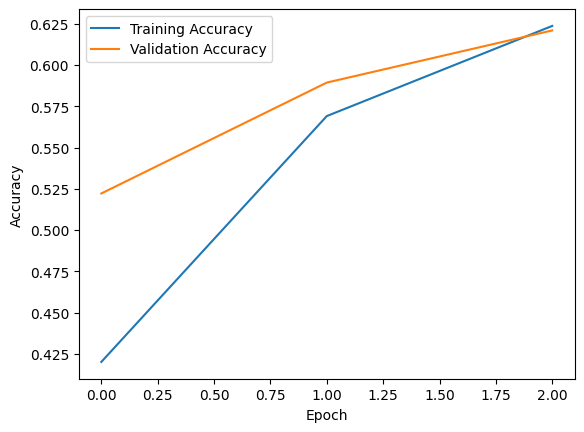

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output to feed into a densely connected layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer with 10 units (corresponding to 10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the CNN
history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

# Evaluate the trained model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Milestone 4: Deep Learning Frameworks (2000s-present)


PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab (FAIR). It provides a flexible platform for building and training neural networks with support for automatic differentiation, dynamic computation graphs, and GPU acceleration. PyTorch has gained popularity due to its intuitive syntax and Pythonic interface, making it a preferred choice for both researchers and practitioners in the deep learning community.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a fully connected neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the input images
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the neural network, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
def train(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

# Evaluate the trained model
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Train and evaluate the model
train(model, train_loader, criterion, optimizer, epochs=5)
evaluate(model, test_loader)

100%|██████████| 9912422/9912422 [00:00<00:00, 138590323.83it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 76378117.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42334502.90it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 14699482.07it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 0.3993372688693469
Epoch 2, Loss: 0.18736197790706843
Epoch 3, Loss: 0.13723674110933218
Epoch 4, Loss: 0.11126982669201074
Epoch 5, Loss: 0.09448662408188716
Test Accuracy: 96.41%


# Milestone 5: Transformers and Attention Mechanism (2017-present)


Transformers are a type of neural network architecture introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017. They rely on self-attention mechanisms to weigh the importance of different input tokens dynamically, enabling efficient processing of sequences without relying on recurrence or convolution. Attention mechanisms allow Transformers to focus on relevant parts of the input sequence when making predictions.



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define the Transformer model components

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads

        self.query_dense = Dense(d_model)
        self.key_dense = Dense(d_model)
        self.value_dense = Dense(d_model)

        self.dense = Dense(d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(inputs, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention_logits = tf.matmul(query, key, transpose_b=True)
        scaled_attention_logits /= tf.math.sqrt(tf.cast(self.depth, tf.float32))

        if mask is not None:
            scaled_attention_logits += (mask * -1e9)

        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, value)

        output = tf.transpose(output, perm=[0, 2, 1, 3])
        output = tf.reshape(output, (batch_size, -1, self.d_model))

        output = self.dense(output)
        return output

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(d_model, num_heads)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(d_model),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs["query"] + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Create a Transformer model using the Keras functional API

def create_transformer_model(input_shape, num_layers, d_model, num_heads, ff_dim, num_classes, dropout_rate=0.1):
    inputs = Input(shape=input_shape, name="input_layer")
    x = inputs

    for _ in range(num_layers):
        x = TransformerBlock(d_model, num_heads, ff_dim, dropout_rate)(x)

    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs, name="transformer_model")
    return model

# Prepare the data and train the Transformer model

# Assume we have prepared data X_train, y_train, X_test, y_test
# input_shape = (sequence_length, embedding_dim)

input_shape = (100, 128)  # Example input shape (sequence_length, embedding_dim)
num_layers = 4
d_model = 128
num_heads = 8
ff_dim = 512
num_classes = 10
dropout_rate = 0.1

model = create_transformer_model(input_shape, num_layers, d_model, num_heads, ff_dim, num_classes, dropout_rate)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Assuming X_train, y_train, X_test, y_test are your training and test data
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))